<a href="https://colab.research.google.com/github/maryawamaitha/A-Food-Sales-PredictionsProject/blob/main/Project1_FoodSalesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Maryanne Gachema

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')


In [7]:
filename = '/content/sales_predictions.csv'
sales_cata = pd.read_csv(filename)
sales_cata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


How many rows and columns are in the dataset?

In [8]:
sales_cata.shape


(8523, 12)

 What are the datatypes of each variable?

In [9]:

sales_cata.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Are there duplicates?

In [10]:

sales_cata.duplicated().any()

False

Identifying any missing values.

In [11]:

sales_cata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Missing data at columns - Item_Weight and Outlet_Size

In [12]:
sales_cata.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
#5) Decide on how to address the missing values and do it! 
#***Replace the missing values with zero: This does not alter the table in terms of no of rows and column
#sales_cata['Item_Weight'].fillna(value = 0, inplace =True)
#sales_cata['Outlet_Size'].fillna(value = 'Null', inplace =True)

Find and fix any inconsistent categories of data 


In [15]:
print(sales_cata['Item_Fat_Content'].unique())
print(sales_cata['Item_Type'].unique())
print(sales_cata['Outlet_Size'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['Medium' nan 'High' 'Small']


There is inconsitency on the Item Fat Content column

In [16]:
sales_cata['Item_Fat_Content'].replace({'reg': 'Regular', 'low fat': 'Low Fat', 'LF': 'Low Fat'}, inplace=True)

In [17]:
sales_cata['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

Obtain the summary statistics of each (min, max, mean) for the numerical columns

In [18]:
sales_cata.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


EXPLORATORY VISUALIZATION

Which Items were frequently bought in the Various Stores?

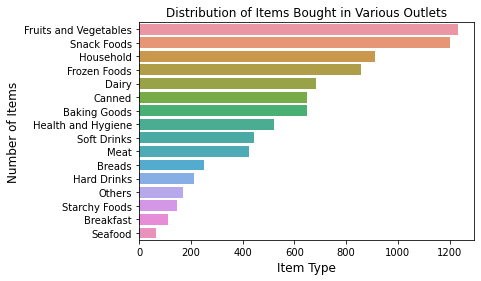

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


In [19]:
plt.title('Distribution of Items Bought in Various Outlets')
sns.countplot(data=sales_cata, y='Item_Type',order=sales_cata.Item_Type.value_counts().index);
plt.xlabel('Item Type', fontsize = 12);
plt.ylabel('Number of Items', fontsize = 12);
plt.show()
print(sales_cata['Item_Type'].value_counts())

Fruits and Vegetables and Snack foods are the most bought items

Which Fat_Content_Type (Low Fat vs Regular was more Popular/most Purchased?

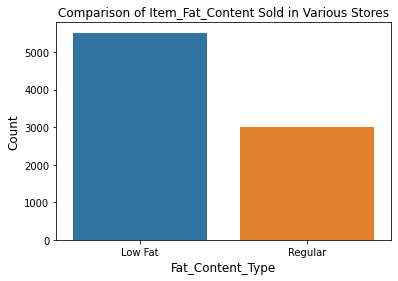

In [20]:

sns.countplot(data=sales_cata, x='Item_Fat_Content', order=sales_cata.Item_Fat_Content.value_counts().index);
plt.title('Comparison of Item_Fat_Content Sold in Various Stores');
plt.xlabel('Fat_Content_Type', fontsize = 12);
plt.ylabel('Count', fontsize = 12);


Low_fat Content items were the most purchased

Heatmap generally shows a correlation of the variables in the dataset.

Based on the heatmap- there is a correlation bewteen the Item_MRP and outlet sales

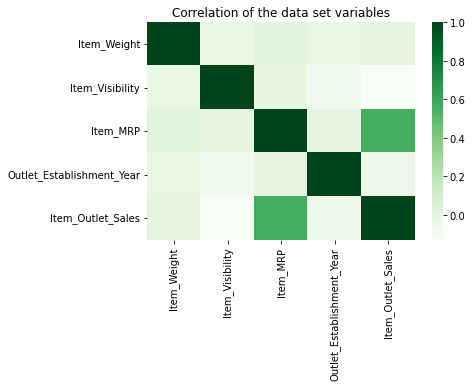

In [21]:

corr = sales_cata.corr()
sns.heatmap(corr,cmap='Greens');
plt.title('Correlation of the data set variables');

How does the outlet_location affect the item sales?

In [22]:
avg_out = sales_cata.groupby(['Outlet_Location_Type','Outlet_Type'])['Item_Outlet_Sales'].mean()
avg_out

Outlet_Location_Type  Outlet_Type      
Tier 1                Grocery Store         340.329723
                      Supermarket Type1    2313.099451
Tier 2                Supermarket Type1    2323.990559
Tier 3                Grocery Store         339.351662
                      Supermarket Type1    2298.995256
                      Supermarket Type2    1995.498739
                      Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

#How the Outlet location influenced the Item Sales.


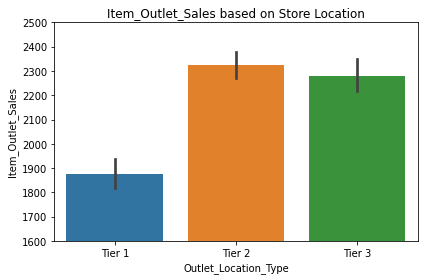

In [23]:

sns.barplot(data=sales_cata, x='Outlet_Location_Type', y='Item_Outlet_Sales',order=['Tier 1','Tier 2', 'Tier 3']);
plt.title('Item_Outlet_Sales based on Store Location')
plt.tight_layout()
plt.ylim(1600,2500);

Based on the results, it is evident Tier 2 Stores made the largest sales while tier 1 made the least sales

#Which of the Outlets had the Highest Sales?

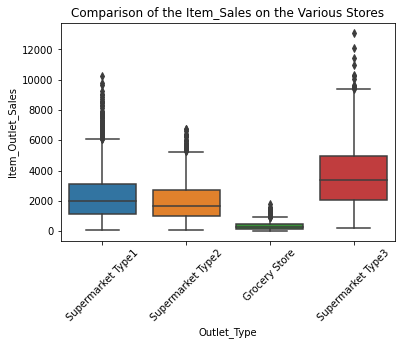

In [24]:
#This bar chart shows the average sales for each outlet. 
sns.boxplot(data=sales_cata,x='Outlet_Type',y='Item_Outlet_Sales');
plt.title('Comparison of the Item_Sales on the Various Stores');
plt.xticks(rotation=45);

It is clear Supermarket Type 3 had the highest sales while grocery store had the least sales

In [25]:
sales_cata.groupby(['Item_Type','Outlet_Type'])['Item_Outlet_Sales'].mean()


Item_Type      Outlet_Type      
Baking Goods   Grocery Store         292.082544
               Supermarket Type1    2102.021249
               Supermarket Type2    1780.368782
               Supermarket Type3    3248.872417
Breads         Grocery Store         381.967442
                                       ...     
Soft Drinks    Supermarket Type3    3284.938836
Starchy Foods  Grocery Store         300.122154
               Supermarket Type1    2550.174048
               Supermarket Type2    1947.699988
               Supermarket Type3    3512.190114
Name: Item_Outlet_Sales, Length: 64, dtype: float64

#MACHINE LEARNING:using machine learning to make predictions about future sales based on the data 

Identify the target (X) and features (y):The target is Item Outlet Sales

In [26]:
X=sales_cata.drop(columns='Item_Outlet_Sales')
y=sales_cata['Item_Outlet_Sales']

Performing a train test split 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

The columns: Outlet Size and Item fat content are ordinal features:

-Hence performing Ordinal Encoding

In [28]:
sales_cata['Outlet_Size'].replace({'Small':0, 'Medium':1, 'High':2}, inplace=True)
sales_cata['Item_Fat_Content'].replace({'Low Fat': 0, 'Regular': 1}, inplace=True)

Preprocessing Steps

In [29]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

freq_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')

scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [30]:
numeric_pipe = make_pipeline(median_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [31]:
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [32]:

number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fca3090b910>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fca3090b950>)])

In [33]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [34]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
X_train_processed

0 missing values in training data
0 missing values in testing data


array([[ 0.82748547, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.56664432, -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.12102782,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.12389588, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.77599877, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82748547, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

In [35]:
X_train_df = pd.DataFrame(X_train_processed)
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1552,1553,1554,1555,1556,1557,1558,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591
0,0.827485,-0.712775,1.828109,1.327849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.566644,-1.291052,0.603369,1.327849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.121028,1.813319,0.244541,0.136187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.158464,-1.004931,-0.952591,0.732018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.538870,-0.965484,-0.336460,0.493686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
